# DECISION TREE

# LOAD THE DEPENDANCIES

## Pandas

In [ ]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix

## Numpy

In [ ]:
import numpy as np
from numpy import set_printoptions

## Matplotlib & Seaborn

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import graphviz

## Sklearn

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree.export import 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score

## Math & Statistics

In [ ]:
from scipy import stats
from scipy.stats import norm
import math

## System

In [ ]:
import os
import sys
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## notebook widgets

In [ ]:
import ipywidgets as widgets
from IPython.display import Image
from IPython.display import display, Math, Latex

# FUNCTIONS

In [185]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        
        the_data_type=dataset[i].dtype.name
        if (the_data_type=='object'):
            lable_enc=preprocessing.LabelEncoder()
            lable_enc.fit(dataset[i])
            labels=lable_enc.classes_   #this is an array
            labels=list(labels) #converting the labels array to a list
            print(labels)
            dataset[i]=lable_enc.transform(dataset[i])

            return labels
    
        else:
            c=list(np.unique(dataset[i]))
            return [str(x) for x in c]

In [186]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    
    
    return X_train, X_test

In [187]:
def plot_of_data_space(dataset,data,labels,input_headers):
    
    
    xx_1=pd.DataFrame(data[:,0]) 
    xx_2=pd.DataFrame(data[:,1]) 
    y=pd.DataFrame(labels)
    
   
    plt.figure(figsize=(15,10)) 
    b=plt.scatter(xx_1[y==0],xx_2[y==0],color='b') 
    r=plt.scatter(xx_1[y==1],xx_2[y==1],color='r')
    g=plt.scatter(xx_1[y==2],xx_2[y==2],color='g') 
    bl=plt.scatter(xx_1[y==3],xx_2[y==3],color='black')
    
    
#     for i in range(0,len(xx_1)):
#         print(y[i])
#         if (y[i]==0):
#             a=plt.scatter(xx_1[i],xx_2[i],marker='o',color='blue',s=30)
#         if (y[i]==1):
#             b=plt.scatter(xx_1[i],xx_2[i],marker='o',color='red',s=30)
#         if (y[i]==2):
#             c=plt.scatter(xx_1[i],xx_2[i],marker='o',color='green',s=30)
#         if (y[i]==3):
#             d=plt.scatter(xx_1[i],xx_2[i],marker='o',color='black',s=30)
        
#     plt.xlabel(f1);plt.ylabel(f2);
#     plt.legend((a,b),tuple(np.unique(labels)))

    plt.xlabel(input_headers[0])
    plt.ylabel(input_headers[1])

    plt.grid()
    plt.legend((b,r,g,bl),tuple(np.unique(labels)))
    plt.show()


In [188]:
def split_the_dataset(dataset,input_headers,target_header):
    
    X=dataset[input_headers]
    y=dataset[target_header]
    
    X.head()
    
    return X,y

In [189]:
def replacing_zeros(dataset,the_headers):
    """Function used to remove zeros from numeric features when 0 is not practical"""

    for header in the_headers:
        dataset[header]=dataset[header].replace(0,np.nan)
        mean=int(dataset[header].mean(skipna=True))
        dataset[header]=dataset[header].replace(np.nan,mean)
        
    return dataset

# MAIN PROGRAM

## Get Data

In [190]:
if __name__ == "__main__":
    
    
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/iris_/iris_data.csv'
#     location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\CDH_Train.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/0529_/0529_pass_rush.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/titan/titantic_1.csv'
    location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\diabetes.csv'
    dataset=pd.read_csv(location)
    # df=pd.read_csv('thermostat_dataset.txt',delimiter='\t')

In [191]:
    dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [192]:
    dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [193]:
    # header='model_target'
    # i='Length'
    # l=legend_labels=['0','1','2','3']
    # L0_data=df[(df[header]==0)]
    # L1_data=df[(df[header]==1)]
    # L2_data=df[(df[header]==2)]
    # L3_data=df[(df[header]==3)]

    # print(L1_data)

    # sns.distplot(L0_data[i],kde=True,kde_kws={"label": l[0]},color='blue')
    # sns.distplot(L1_data[i],kde=True,kde_kws={"label": l[1]},color='red')
    # sns.distplot(L2_data[i],kde=True,kde_kws={"label": l[2]},color='green')
    # sns.distplot(L3_data[i],kde=True,kde_kws={"label": l[3]},color='black')

    # plt.show()

In [194]:
# Replace zeros with the mean where needed.
rz=input('Do you need to replace any zeros in the dataset?')
if (rz.lower()=='y'):
    the_headers=['Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    dataset=replacing_zeros(dataset,the_headers)
    dataset.head()

Do you need to replace any zeros in the dataset?y


### Selecting inputs and targets

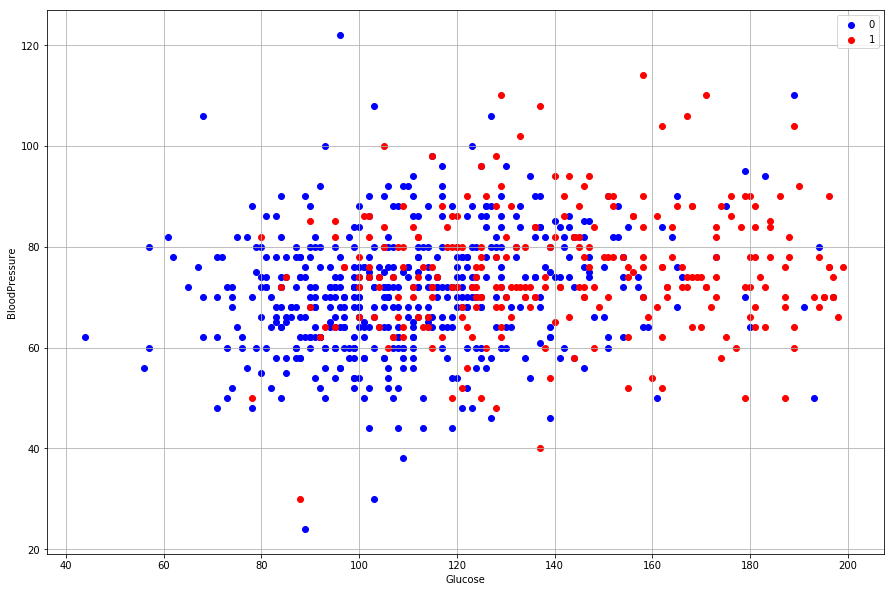

   Glucose  BloodPressure
0    148.0           72.0
1     85.0           66.0
2    183.0           64.0
3     89.0           66.0
4    137.0           40.0


In [195]:
# target_header=['model_target']
# input_headers=['Length','Width']

# target_header=['Survived']
# input_headers=['Parch','Fare']

# target_header=['play_type']
# input_headers=['score_differential','yardline_100']
# input_headers=['score_differential','game_seconds_remaining','yardline_100','qtr']

# target_header=['Species']
# input_headers=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

target_header=['Outcome']
input_headers=['Glucose','BloodPressure']
# input_headers=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

target_label=label_encoding(dataset,target_header)

classes=target_label
test_label=label_encoding(dataset,input_headers)
#     print(test_label)


X,y=split_the_dataset(dataset,input_headers,target_header)
#     print(y.values)
if (X.values.shape[1]==2):
    plot_of_data_space(dataset,X.values,y.values,input_headers)

print(X.head())

In [197]:
    X.head()

,Glucose,BloodPressure
0,148.0,72.0
1,85.0,66.0
2,183.0,64.0
3,89.0,66.0
4,137.0,40.0


In [201]:
X.values

array([[148.,  72.],
       [ 85.,  66.],
       [183.,  64.],
       ...,
       [121.,  72.],
       [126.,  60.],
       [ 93.,  70.]])

KeyError: 'Outcome'

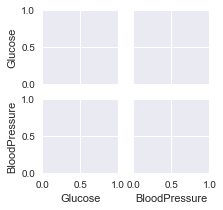

In [205]:
    sns.set()
    sns.pairplot(X,hue='Outcome', size=1.5)
    plt.show()

In [159]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [160]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.20)

In [161]:
ytest.shape

(154, 1)

In [162]:
#Scale the data    
Xtrain, Xtest=feature_scaling(Xtrain,Xtest)


StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.31014869  1.14222155]
 [-0.21095627 -0.04560042]
 [ 1.25465143 -1.91217781]
 [-0.53664687 -1.5728001 ]
 [-1.12288996  0.12408843]]


In [163]:
ytest.head()

,Outcome
30,0
581,0
345,0
524,0
110,1


In [164]:
model = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [165]:
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [166]:
y_model=model.predict(Xtest)
y_model

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [167]:
# y_model_prob=model.predict_proba(Xtest)
# y_model_prob

In [168]:
accuracy_score(ytest,y_model)

0.6623376623376623

In [169]:
recall_score(ytest, y_model,average=None)

array([0.75238095, 0.46938776])

In [170]:
precision_score(ytest, y_model,average=None)

array([0.75238095, 0.46938776])

In [171]:
cm=confusion_matrix(ytest, y_model)

In [172]:
cm

array([[79, 26],
       [26, 23]], dtype=int64)

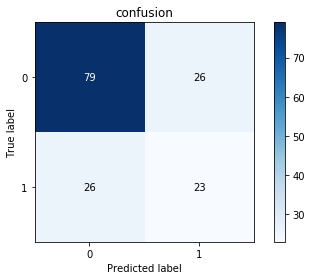

In [173]:
fig, ax = plt.subplots()
cmap=plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title="confusion",
       ylabel='True label',
       xlabel='Predicted label')



# Loop over data dimensions and create text annotations.
normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()



plt.show()

In [174]:
score=cross_val_score(model,X,y,cv=10)

In [175]:
score

array([0.62337662, 0.62337662, 0.7012987 , 0.63636364, 0.64935065,
       0.63636364, 0.66233766, 0.66233766, 0.61842105, 0.76315789])

In [176]:
score.mean()

0.6576384142173616

C:\Users\Public\Programming\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


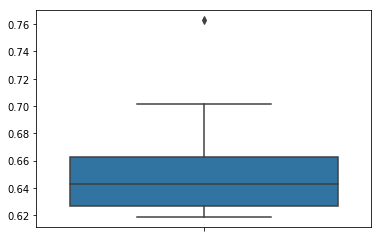

In [177]:
sns.boxplot(x=score,orient='v')
plt.show()

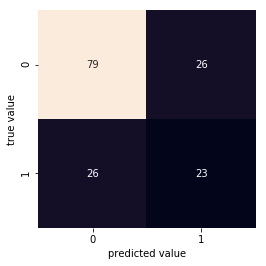

In [178]:
sns.heatmap(cm,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [179]:
dot_data=tree.export_graphviz(model, out_file=None, 
                     feature_names=input_headers,  
                     class_names=classes,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(dot_data) 

In [181]:
graph.render(r'C:\Users\Crystal\Desktop\Programs\machine_learning\jim')

'C:\\Users\\Crystal\\Desktop\\Programs\\machine_learning\\jim.pdf'

In [ ]:
# graph

In [ ]:
# decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
# decision_tree = decision_tree.fit(Xtrain,ytrain)
# r = export_text(model, feature_names=input_headers)
# print(r)

In [ ]:
dataset.sample(10)

In [ ]:
[str(c) for c in classes]